In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
species = "horse"
sv_info_file = 'horse/'+species+'_info.txt'
output_file = 'horse/'+species+'_insertion_1374.txt'

In [24]:
#INSERTIONS#
df = pd.read_csv(sv_info_file, sep='\t', lineterminator='\n')
print(df.head())
#df.columns = ['chrom','start','end','length']
#df.columns = ['chrom','start','end','length','seq']
df.columns = ['chrom','start','end','length','seq', 'species']
print(df.head())

   1  3033494  3033494.1     .  \
0  1  3416469    3416469     .   
1  1  4086331    4086516  6641   
2  1  6036546    6036546   250   
3  1  6100124    6100124   250   
4  1  6764192    6764192    56   

  GCAACCCGTCCTGTTGATAACAGTGCTAATCACTCCACCTCACACTGGTGAGACAACAAAACCTTACAATTGTTGAGCGTCATAACTTCTCTTCGGTTTATAGTGCCAACGCCATTTTCATCTTTTGGGTATTTATTGTTTTTGTTGTTGGTTTTGTTTTTTGAGGAAGACTGGCCCTGAGCTAACATCCGTGCCCATCTTCCTCTACTTTACATGTGGGACGCCTACCACAGCATGACGTGCCAAGCAGTGCCATGTCTGCACCCAGGATCCGAACCGACGAACCTCGGGCCGCCAAAGCAGAACATGTGAGCTTAACCACTGCGCCACCAAGCCAGGCCTCTTTTGGGTATTTAAGTAAGTCAGGATAGTCTA-ATTATACAGCATCTCCTGTTCCTGGAGCAGCTGCTTACCACTCGGGACTCTGCCCAAGCCAGTCCCTCTGTCTGGAACGTCCACCCCTCGTCTCCCCTTCCAGTCAGGCTTCAG  \
0  TTTAAAGATTTTATTTTTTTCCTTTTTCTCCCCAAAGCCCCCCTGG...                                                                                                                                                                                                                                                       

In [25]:
#df_new = df.loc[df['length'] == '246']
#df_new6 = df[(df['length'] >= '246') & (df['length'] <= '246')]
df= df[(df['length'] >= '1370') & (df['length'] <= '1376')]
df_new = df[df['length']!='.']

In [26]:
#df_new = pd.DataFrame()
#print(len(df_new6), len(df_new7))
#df_new = pd.concat([df_new6[0:2000],df_new7[0:2000]])
#df_new = df_new6[0:4352]
df_new = df.drop_duplicates(subset=['chrom','start','end','species'], keep='first')
#df_new = df
print(len(df_new))

369


In [27]:
with open(output_file, 'w') as f:
    for i,row in df_new.iterrows():
        coords = '>'+str(row['chrom'])+':'+str(row['start'])+'-'+str(row['end'])+"?"+str(row['species'])
        #coords = str(row['chrom'])+'\t'+str(row['start'])+'\t'+str(row['end'])
        f.write(coords)
        f.write('\n')
        f.write(row['seq'])
        f.write('\n')

In [28]:
print('done')

done


In [19]:
df = pd.read_csv('horse/annotated_tes/mong_13k_te.txt', sep='\t', lineterminator='\n')
df.columns = ['chrom','start','end','subfam','fam']
print(df.head())

   chrom      start        end  subfam               fam
0      1   82375529   82375531   L1MDa           LINE/L1
1      1  140174052  140174054   L1MEf           LINE/L1
2      1  155995326  155995328  MER44C  DNA/TcMar-Tigger
3      1  155995319  155995321  MER44C  DNA/TcMar-Tigger
4      1  155995326  155995328  MER44C  DNA/TcMar-Tigger


In [51]:
x = df['subfam'].value_counts()
y = df['fam'].value_counts()

<AxesSubplot:xlabel='TE Subfamily', ylabel='Frequency'>

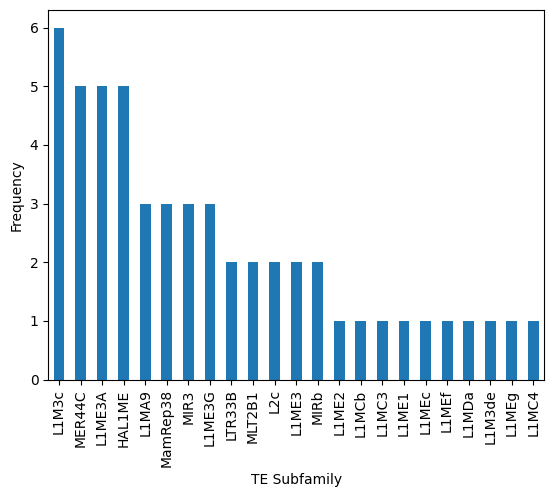

In [52]:
x[0:30].plot(kind='bar',xlabel='TE Subfamily', ylabel='Frequency')

<AxesSubplot:xlabel='TE Family', ylabel='Frequency'>

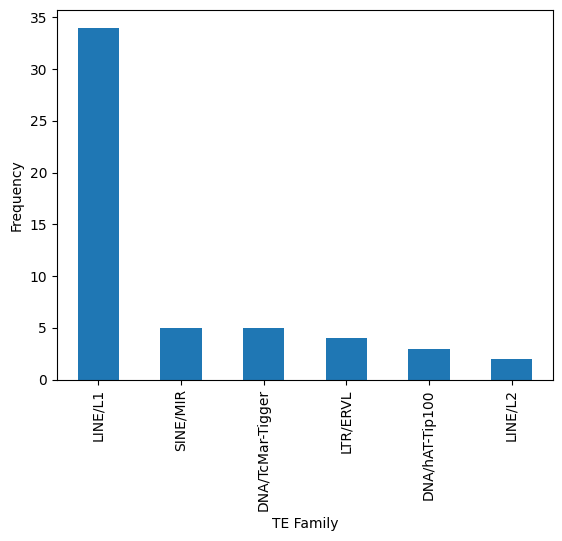

In [53]:
y[0:15].plot(kind='bar',xlabel='TE Family', ylabel='Frequency')

<AxesSubplot:xlabel='TE Family', ylabel='Frequency'>

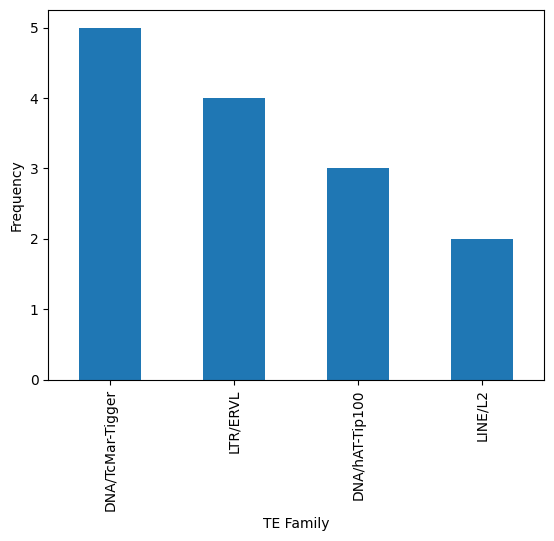

In [54]:
y[2:17].plot(kind='bar',xlabel='TE Family', ylabel='Frequency')

<AxesSubplot:xlabel='TE Subfamily', ylabel='Frequency'>

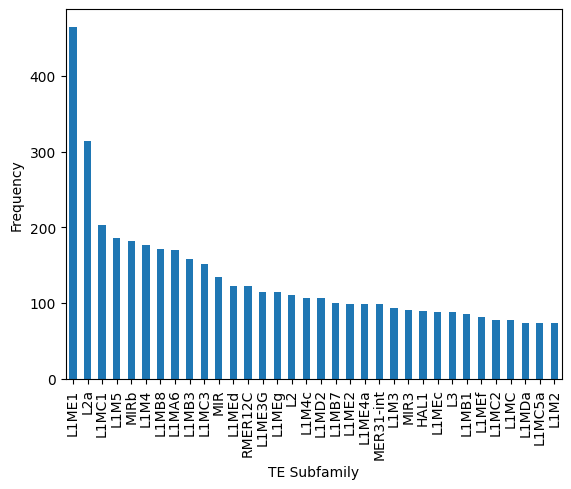

In [30]:
x[1:35].plot(kind='bar',xlabel='TE Subfamily', ylabel='Frequency')

In [33]:
df_clean = df[~df['subfam'].astype(str).str.startswith('L1')]
df_clean = df_clean[~df_clean['subfam'].astype(str).str.startswith('L2')]
print(df_clean.head())

   chrom     start       end    subfam               fam
0      1  11069205  11069207   LTR86B1          LTR/ERVL
7     10  63272953  63272955  Tigger6a  DNA/TcMar-Tigger
8     10  63272968  63272970  Tigger6a  DNA/TcMar-Tigger
9     10  82488427  82488429  MER34C_v          LTR/ERV1
10    11  30816639  30816641    LTR16C          LTR/ERVL


<AxesSubplot:xlabel='TE Subfamily', ylabel='Frequency'>

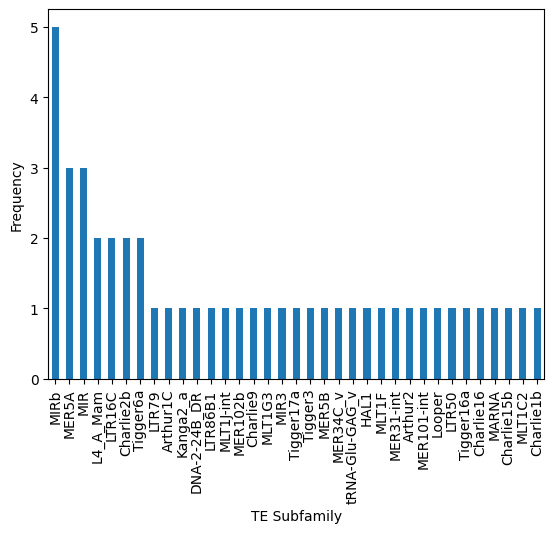

In [34]:
z = df_clean['subfam'].value_counts()
z_fam = df_clean['fam'].value_counts()
z[0:35].plot(kind='bar',xlabel='TE Subfamily', ylabel='Frequency')

<AxesSubplot:xlabel='TE Family', ylabel='Frequency'>

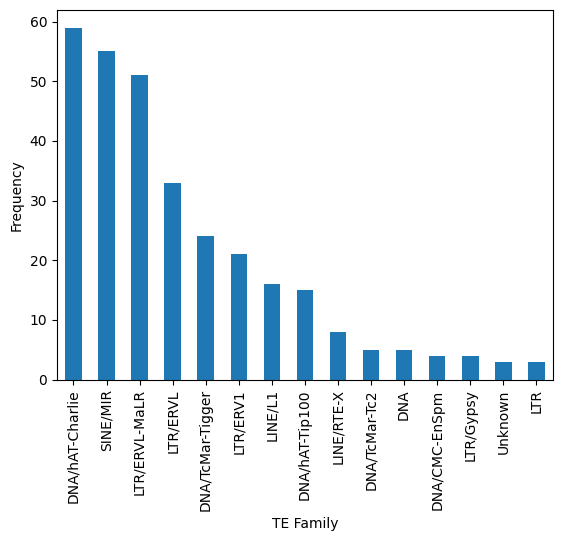

In [114]:
z_fam[0:15].plot(kind='bar',xlabel='TE Family', ylabel='Frequency')

In [95]:
first_sub = ['Tigger1', 'L1MEf', 'L1MA9', 'L1MA9', \
             'L1MA9', 'L1MB8', 'MER5A', 'L1MA9', \
             'L1ME3C', 'L1MA9', 'L1M5', 'L1M5', \
             'L1MB1']
second_sub = ['MER113', 'L1ME3D', 'L1MCa', 'L1MB7', 'L2a', 'L1MA6', 'L1MC1', 'L1ME2z', 'MLT2D', 'L1MA7', 'Charlie1']

<AxesSubplot:xlabel='TE Subfamily', ylabel='Frequency'>

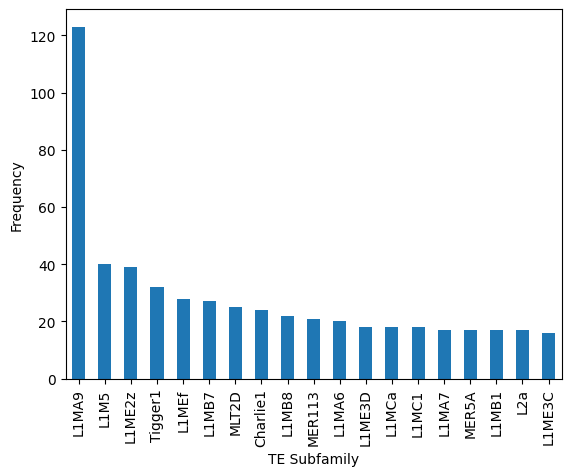

In [96]:
dels = first_sub + second_sub
df2 = pd.DataFrame()
df2['subfam'] = dels
del_count = df_dels['subfam'].value_counts()

ax = x[0:30].plot(kind='bar',xlabel='TE Subfamily', ylabel='Frequency')
del_count.plot(ax=ax, kind = 'bar', label = 'dels')

#df['del_subfam'] = dels
#df_dels = pd.DataFrame()
#df_dels['subfam'] = dels
#del_count = df_dels['subfam'].value_counts()
#del_count.plot(kind='bar',xlabel='TE Subfamily', ylabel='Frequency')